<a href="https://colab.research.google.com/github/arvind2047/gl_capstone/blob/week4-branch/Capstone_Automatic_Ticket_Assignment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import os
project_path = '/content/drive/My Drive/Capstone Project NLP/' 
os.chdir(project_path) 
os.getcwd()

'/content/drive/My Drive/Capstone Project NLP'

### Load and Uderstand the Data

In [28]:
# read and load data
## Read the data from EXCEL
incidents = pd.read_excel(project_path + "input_data.xlsx")

## Quick View 
incidents.head(3)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0


In [29]:
## basic info
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [30]:
## Shape
incidents.shape

(8500, 4)

In [31]:
incidents.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [32]:
incidents["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [33]:
incidents["Assignment group"].nunique()

74

In [34]:
## find nulls
incidents[incidents.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [35]:
## find NA
incidents[incidents.isna().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [36]:
# drop nulls
incidents.dropna(inplace=True)
incidents.shape

(8491, 4)

In [37]:
## Duplicates 
sub_incidents = incidents[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateRowsDF = sub_incidents[sub_incidents.duplicated()]
duplicateRowsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [38]:
# Remove Duplicates
incidents_upd = incidents.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

#### Basic cleansing of data

In [39]:
# before removing caller we can see that similar string is present in description, we can clean decription first


incidents_upd['Caller email'] = incidents_upd.apply(lambda x: x['Caller'].replace(' ', '.'), axis=1)
incidents_upd['Caller email'] = incidents_upd.apply(lambda x: x['Caller email'] + '@gmail.com', axis=1)
incidents_upd.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Short description,Description,Caller,Assignment group,Caller email
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,spxjnwir.pjlcoqds@gmail.com
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,hmjdrvpb.komuaywn@gmail.com
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,eylqgodm.ybqkwiam@gmail.com
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz.gcpydteq@gmail.com
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme.qhcozdfx@gmail.com
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,eflahbxn.ltdgrvkz@gmail.com
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,jyoqwxhz.clhxsoqy@gmail.com
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,eqzibjhw.ymebpoih@gmail.com
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,mdbegvct.dbvichlg@gmail.com
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,fumkcsji.sarmtlhy@gmail.com


In [40]:
incidents_upd['Description']=incidents_upd.apply(lambda x: x['Description'].replace(x['Caller email'], ''), axis=1)
incidents_upd.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Short description,Description,Caller,Assignment group,Caller email
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,spxjnwir.pjlcoqds@gmail.com
1,outlook,"\r\n\r\nreceived from: \r\n\r\nhello team,\r\n...",hmjdrvpb komuaywn,GRP_0,hmjdrvpb.komuaywn@gmail.com
2,cant log in to vpn,\r\n\r\nreceived from: \r\n\r\nhi\r\n\r\ni can...,eylqgodm ybqkwiam,GRP_0,eylqgodm.ybqkwiam@gmail.com
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz.gcpydteq@gmail.com
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme.qhcozdfx@gmail.com
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,eflahbxn.ltdgrvkz@gmail.com
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,jyoqwxhz.clhxsoqy@gmail.com
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,eqzibjhw.ymebpoih@gmail.com
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,mdbegvct.dbvichlg@gmail.com
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,fumkcsji.sarmtlhy@gmail.com


In [41]:
# Observation :: caller column is useless and can be dropped

incidents_upd = incidents_upd.drop(['Caller'],axis=1)
incidents_upd = incidents_upd.drop(['Caller email'],axis=1)

In [42]:
#remove spaces trailing
incidents_upd['Short description'] = incidents_upd['Short description'].str.strip()
incidents_upd['Description'] = incidents_upd['Description'].str.strip()

#remove tabs and carriage returns
incidents_upd.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

#Getting rid of numbers & special characters etc

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    incidents_upd['Short description'] = incidents_upd['Description'].str.replace(char, ' ')
    incidents_upd['Description'] = incidents_upd['Description'].str.replace(char, ' ')

#remove numbers    
incidents_upd['Description'] = incidents_upd['Description'].replace('\d+', '', regex=True)
incidents_upd['Short description'] = incidents_upd['Short description'].replace('\d+', '', regex=True)
    
#remove more than 1 space
incidents_upd.replace('\s+', ' ', regex=True, inplace=True)

#make lower case
incidents_upd.apply(lambda x: x.astype(str).str.lower())

incidents_upd.head(10)

,Short description,Description,Assignment group
0,verified user details employee manager name c...,verified user details employee manager name c...,GRP_0
1,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,GRP_0
2,received from hi i cannot log on to vpn best,received from hi i cannot log on to vpn best,GRP_0
3,unable to access hr tool page,unable to access hr tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,event critical HostName company com the value ...,event critical HostName company com the value ...,GRP_1
7,ticket no employment status new non employee e...,ticket no employment status new non employee e...,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant,ticket update on inplant,GRP_0


In [43]:
#merge short Description & Description

incidents_upd['isSubstr'] = incidents_upd.apply(lambda x: x['Short description'] not in x['Description'], axis=1)

#Now we see many places short description is redundant. We will append short description to description if True only then drop short descrition
incidents_upd_combined = incidents_upd.copy()
incidents_upd_combined.loc[incidents_upd_combined['isSubstr'] == True, 'Description'] = incidents_upd_combined['Short description'] + " "+ incidents_upd_combined['Description']
#Drop Short description
incidents_upd_combined = incidents_upd_combined.drop(['Short description'],axis=1)
incidents_upd_combined = incidents_upd_combined.drop(['isSubstr'],axis=1)
incidents_upd_combined.tail(10)

,Description,Assignment group
8490,please contact ed pasgryowski pasgryo about hi...,GRP_29
8491,received from i need a vpn for my new laptop n...,GRP_34
8492,hr tool etime option not visitble,GRP_0
8493,i am sorry i have another two accounts that ne...,GRP_10
8494,tablet needs reimaged due to multiple issues w...,GRP_3
8495,received from good afternoon i am not receivin...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62
8499,an mehreren pc s lassen sich verschiedene prgr...,GRP_49


In [44]:
## Group by Categories
df_grp = incidents_upd_combined.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3926
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


In [45]:
df_grp.describe()

,counts
count,74.000000
mean,113.621622
std,459.823990
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3926.000000



**Observation**

* The Target class distrubtion is extremely skewed
* Large no of entries for GRP_0 (mounting to 3926) which account for ~50% of the data
* There are groups with 1 entry also. Need to merge all groups with small entries to a group to reduce the imbalance in the target. This may reduce the imbalance to some extent.

#### Fix the class imbalance

In [46]:
# Observation :: We have 74 categories. There are few categories with very few tickets.
# It might make sense to consider only those categories with atleast 20 representations.
# Else our noise levels will be high
group_frequency = dict(incidents_upd_combined['Assignment group'].value_counts())

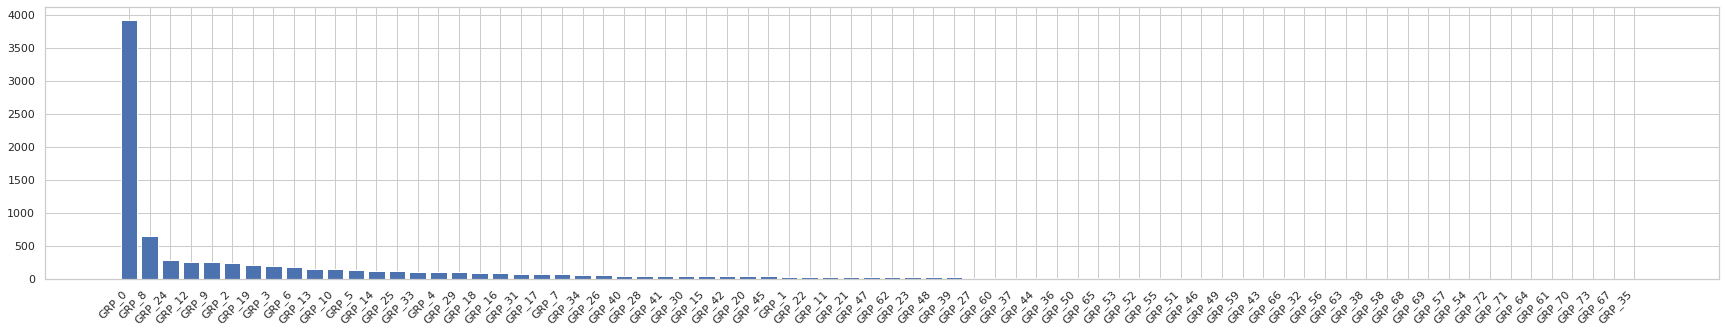

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,5))
plt.bar(range(len(group_frequency)), group_frequency.values(), align='center')
plt.xticks(range(len(group_frequency)), list(group_frequency.keys()), rotation=45, ha="right")

plt.show()

In [48]:
print (group_frequency)

{'GRP_0': 3926, 'GRP_8': 645, 'GRP_24': 285, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 183, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 128, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_31': 69, 'GRP_17': 68, 'GRP_7': 68, 'GRP_34': 61, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_30': 39, 'GRP_15': 38, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_1': 31, 'GRP_22': 31, 'GRP_11': 30, 'GRP_21': 28, 'GRP_47': 27, 'GRP_62': 25, 'GRP_23': 25, 'GRP_48': 25, 'GRP_39': 19, 'GRP_27': 18, 'GRP_60': 16, 'GRP_37': 16, 'GRP_44': 15, 'GRP_36': 15, 'GRP_50': 14, 'GRP_65': 11, 'GRP_53': 11, 'GRP_52': 9, 'GRP_55': 8, 'GRP_51': 8, 'GRP_46': 6, 'GRP_49': 6, 'GRP_59': 6, 'GRP_43': 5, 'GRP_66': 4, 'GRP_32': 4, 'GRP_56': 3, 'GRP_63': 3, 'GRP_38': 3, 'GRP_58': 3, 'GRP_68': 3, 'GRP_69': 2, 'GRP_57': 2, 'GRP_54': 2, 'GRP_72': 2, 'GRP_71': 2, 'GRP_64': 1, 'GRP_61': 1, 'GRP_70': 1, 'GRP_73': 1, 'GRP_67

In [49]:
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df.head(10)

,frequency
GRP_0,3926
GRP_8,645
GRP_24,285
GRP_12,257
GRP_9,252
GRP_2,241
GRP_19,215
GRP_3,200
GRP_6,183
GRP_13,145


In [50]:
group_df.tail(10)

,frequency
GRP_57,2
GRP_54,2
GRP_72,2
GRP_71,2
GRP_64,1
GRP_61,1
GRP_70,1
GRP_73,1
GRP_67,1
GRP_35,1


In [51]:
#lets get the stats of this 
group_df.describe(percentiles=[0.1, .25, .5, .75, .95, .99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,95%,99%,max
frequency,74.0,113.621622,459.82399,1.0,2.0,5.25,26.0,81.0,253.75,1530.87,3926.0


In [52]:
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df.head(10)

,frequency,percent representation
GRP_0,3926,0.466936
GRP_8,645,0.076713
GRP_24,285,0.033896
GRP_12,257,0.030566
GRP_9,252,0.029971
GRP_2,241,0.028663
GRP_19,215,0.025571
GRP_3,200,0.023787
GRP_6,183,0.021765
GRP_13,145,0.017245


In [53]:
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
GRP_0,3926,0.466936,0.466936
GRP_8,645,0.076713,0.543649
GRP_24,285,0.033896,0.577545
GRP_12,257,0.030566,0.608111
GRP_9,252,0.029971,0.638083
GRP_2,241,0.028663,0.666746
GRP_19,215,0.025571,0.692317
GRP_3,200,0.023787,0.716104
GRP_6,183,0.021765,0.737869
GRP_13,145,0.017245,0.755114


**Observation:** 95 percentile is achieved at a frequency of 31.

In [54]:
inv_group_frequency = {}
for k, v in group_frequency.items():
    inv_group_frequency[v] = inv_group_frequency.get(v, [])
    inv_group_frequency[v].append(k)

In [55]:
inv_group_df = pd.DataFrame.from_dict(inv_group_frequency, orient='index', columns=['group1', 'group2', 'group3', 'group4', 'group5', 'group6'])
inv_group_df.tail(10)

,group1,group2,group3,group4,group5,group6
14,GRP_50,None,None,None,None,None
11,GRP_65,GRP_53,None,None,None,None
9,GRP_52,None,None,None,None,None
8,GRP_55,GRP_51,None,None,None,None
6,GRP_46,GRP_49,GRP_59,None,None,None
5,GRP_43,None,None,None,None,None
4,GRP_66,GRP_32,None,None,None,None
3,GRP_56,GRP_63,GRP_38,GRP_58,GRP_68,None
2,GRP_69,GRP_57,GRP_54,GRP_72,GRP_71,None
1,GRP_64,GRP_61,GRP_70,GRP_73,GRP_67,GRP_35


In [56]:
for key, value in inv_group_frequency.items():
    #print value
    print(key, len(value))

3926 1
645 1
285 1
257 1
252 1
241 1
215 1
200 1
183 1
145 1
140 1
128 1
118 1
116 1
107 1
100 1
97 1
88 1
85 1
69 1
68 2
61 1
56 1
45 1
44 1
40 1
39 1
38 1
37 1
36 1
35 1
31 2
30 1
28 1
27 1
25 3
19 1
18 1
16 2
15 2
14 1
11 2
9 1
8 2
6 3
5 1
4 2
3 5
2 5
1 6


In [57]:
#eliminate groups that have very less representation, that is we consider 95% significant data
group_elimination_treshold = 31

In [58]:
group_frequency_filtered = dict(filter(lambda x: x[1] >= group_elimination_treshold, group_frequency.items()))

In [59]:
#Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)

In [60]:
#eliminate
incidents_filtered = incidents_upd_combined[incidents_upd_combined['Assignment group'].isin(valid_grp_list)]
incidents_filtered.head(10)

,Description,Assignment group
0,verified user details employee manager name c...,GRP_0
1,received from hello team my meetings skype mee...,GRP_0
2,received from hi i cannot log on to vpn best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0
5,unable to log in to engineering tool and skype,GRP_0
6,event critical HostName company com the value ...,GRP_1
7,ticket no employment status new non employee e...,GRP_0
8,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant,GRP_0


In [61]:
incidents_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8026 entries, 0 to 8497
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8026 non-null   object
 1   Assignment group  8026 non-null   object
dtypes: object(2)
memory usage: 188.1+ KB


In [62]:
incidents_filtered.describe()

,Description,Assignment group
count,8026,8026
unique,6376,34
top,received from monitoring tool company com job ...,GRP_0
freq,412,3926


##### Generate a wordcloud for the Description column 

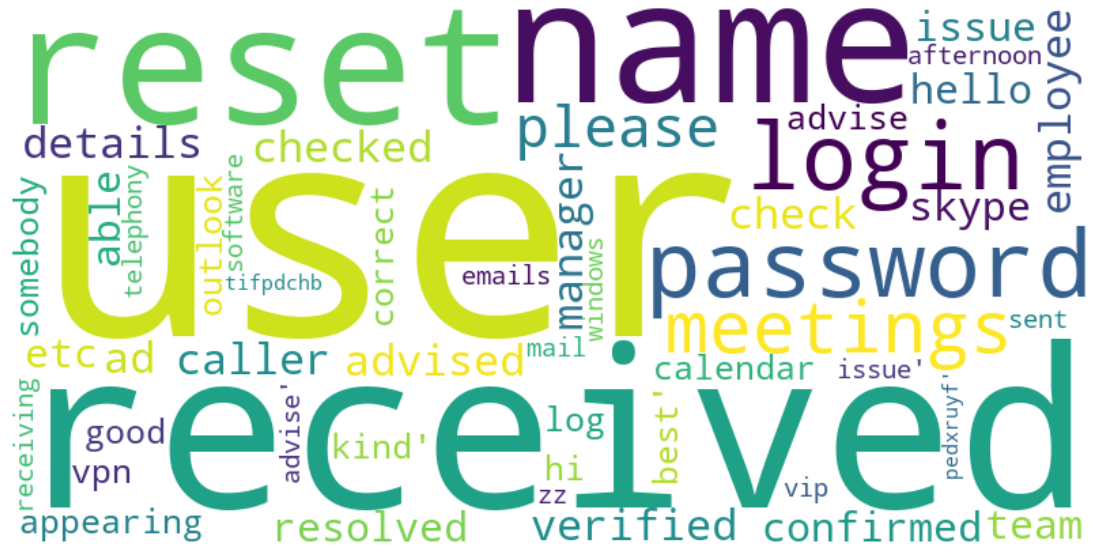

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
stopwords = STOPWORDS

wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(incidents_filtered['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation:** The word cloud shows the top reasons for raising a ticket but it needs to be pre-processed and cleaned to make some sense out of it.

### Text Pre-processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


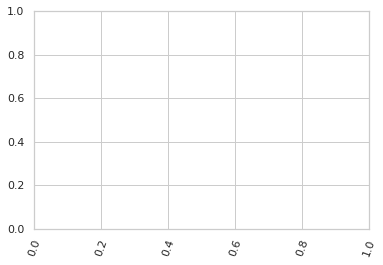

In [64]:
import nltk
import string
from nltk import FreqDist
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [65]:
!pip install fasttext
!pip install contractions
!pip install langdetect
!pip install googletrans

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3016627 sha256=d6ac16b8482f967966b6a71b304c524a0b42ca3f9621237ca8b7e70b7816b38e
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext
     |████████████████████████████████| 317kB 4.6MB/s 
     |████████████████████████████████| 245kB 20.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81708 sha256=fb3e5bf118a7cb00297e4ad02884c99b898537d32bbebbaab2c1a8374557d34c
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 983kB 3.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=d9d7001eef741219ade24c3a80dbfabdd2c1d1225deb275153bd89c82b86e299
  S

In [66]:
import contractions
import fasttext
from langdetect import detect
import googletrans
from googletrans import Translator
from collections import Counter

In [67]:
!pip install gensim
!pip install bs4
!pip install pyLDAvis
!pip install warnings

     |████████████████████████████████| 1.6MB 3.1MB/s 
     |████████████████████████████████| 552kB 17.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=5da2a183f96e9b606313c595f884fa5728f2f230c4bf319bbbe6b22b82356118
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=8a4fac08ab40fe4e9672701c89209bbfa81e686cf6414f046ff63f7f07361f00
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


#### Get the frequency of words in Description Column

In [73]:
# function to plot most frequent terms. This is used to gauge the quality of text processing
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

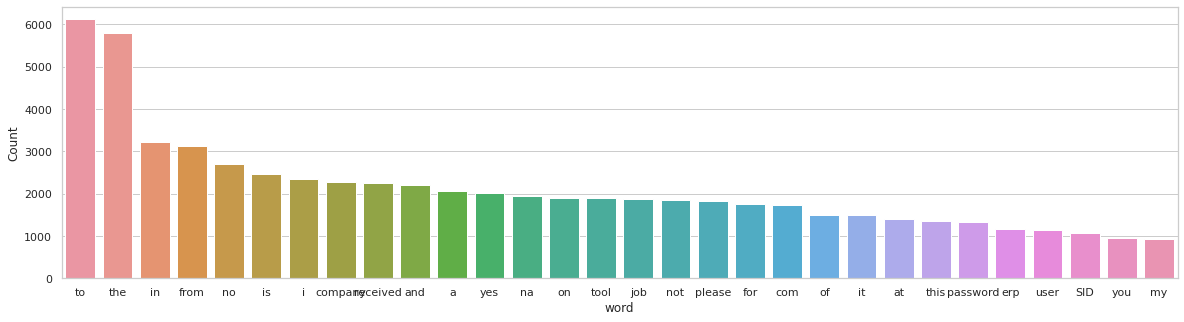

In [74]:
freq_words(list(incidents_filtered['Description']))

#### Expand the contractions

In [75]:
incidents_upd_combined = incidents_filtered.copy()

In [76]:
incidents_upd_combined['Description_Expanded'] = incidents_upd_combined['Description'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#Convert the expanded column to string
incidents_upd_combined['Description_Expanded_Str'] = [' '.join(map(str, l)) for l in incidents_upd_combined['Description_Expanded']]
incidents_upd_combined.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page
4,skype error,GRP_0,"[skype, error]",skype error


#### English Language Detection

In [77]:
pretrained_model = project_path + "lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in incidents_upd_combined['Description_Expanded_Str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
incidents_upd_combined['langs'] = langs

incidents_upd_combined.head(10)

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en
4,skype error,GRP_0,"[skype, error]",skype error,ja
5,unable to log in to engineering tool and skype,GRP_0,"[unable, to, log, in, to, engineering, tool, and, skype]",unable to log in to engineering tool and skype,en
6,event critical HostName company com the value of mountpoint threshold for oracle SID erpdata srp...,GRP_1,"[event, critical, HostName, company, com, the, value, of, mountpoint, threshold, for, oracle, SI...",event critical HostName company com the value of mountpoint threshold for oracle SID erpdata srp...,en
7,ticket no employment status new non employee enter user s name,GRP_0,"[ticket, no, employment, status, new, non, employee, enter, user, s, name]",ticket no employment status new non employee enter user s name,en
8,unable to disable add ins on outlook,GRP_0,"[unable, to, disable, add, ins, on, outlook]",unable to disable add ins on outlook,en
9,ticket update on inplant,GRP_0,"[ticket, update, on, inplant]",ticket update on inplant,en


#### Translate non-English to English

In [78]:
#checking detected languages
x=incidents_upd_combined['langs'].value_counts()

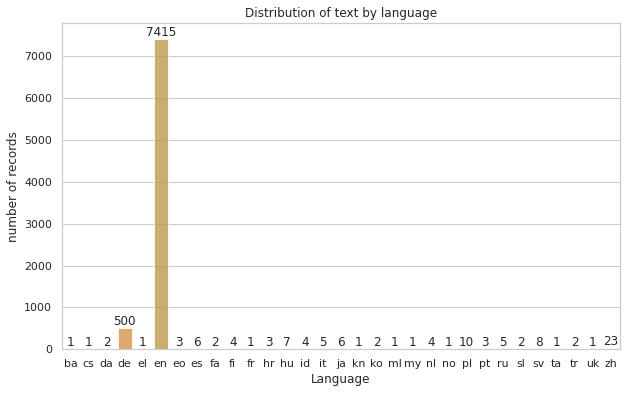

In [79]:
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

#### Translate non-English details

In [81]:
translator = Translator()

desc_trans=[]

for sentence in incidents_upd_combined['Description_Expanded_Str']:
  try:
    trans = translator.translate(sentence).text if language != 'en' else sentence
  except:
    language = "error"
    print("This row throws an error:", sentence)
  desc_trans.append(trans)

incidents_upd_en = incidents_upd_combined.copy()
incidents_upd_en['Translated_Description']=desc_trans
print(incidents_upd_en)
#incidents_upd_en.drop('langs', inplace = True, axis=1)

                                                                                              Description  ...                                                                               Translated_Description
0      verified user details employee manager name checked the user name in ad and reset the password ...  ...  verified user details employee manager name checked the user name in ad and reset the password a...
1     received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...  ...  received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...
2                                                            received from hi i cannot log on to vpn best  ...                                                         received from hi i cannot log on to vpn best
3                                                                           unable to access hr tool page  ...                                          

#### Tokenization

In [87]:
# Package needed for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [88]:
incidents_upd_en['tokenized'] = incidents_upd_en['Translated_Description'].apply(word_tokenize)
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]"


#### Converting all Characters to Lowercase

In [89]:
incidents_upd_en['lower'] = incidents_upd_en['tokenized'].apply(lambda x: [word.lower() for word in x])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]"


#### Removing Punctuations

In [90]:
punc = string.punctuation
incidents_upd_en['no_punc'] = incidents_upd_en['lower'].apply(lambda x: [word for word in x if word not in punc])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]"


#### Removing Stopwords

In [91]:
stop_words = set(stopwords.words('english'))
incidents_upd_en['stopwords_removed'] = incidents_upd_en['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]"


#### Lemmatization

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.
Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming.
1. First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word. 
2. We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. 
3. Finally, we apply NLTK’s word lemmatizer.

##### First step is part of speech tagging

In [92]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [93]:
incidents_upd_en['pos_tags'] = incidents_upd_en['stopwords_removed'].apply(nltk.tag.pos_tag)
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]"


##### Convert to wordnet

In [94]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
incidents_upd_en['wordnet_pos'] = incidents_upd_en['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]"


##### Apply NLTK's word lemmatizer

In [95]:
wnl = WordNetLemmatizer()
incidents_upd_en['lemmatized'] = incidents_upd_en['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ..."
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please..."
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]"
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]"
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]"


In [96]:
incidents_upd_en['lemma_str'] = [' '.join(map(str,l)) for l in incidents_upd_en['lemmatized']]
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error


##### Create 2 new attributes - length and word count of the lemmatized description field

In [97]:
 
incidents_upd_en['desc_len'] = incidents_upd_en['lemma_str'].astype(str).apply(len)
incidents_upd_en['desc_word_cnt'] = incidents_upd_en['lemma_str'].apply(lambda x: len(str(x).split()))

incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


In [98]:
incidents_upd_en.to_csv(project_path + "pre_processed_data.csv")

In [99]:
### Save the model
from sklearn.externals import joblib
joblib.dump(incidents_upd_en, 'Pre_processed_data.pkl', compress=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Pre_processed_data.pkl']

### Exploratory Data Analysis

In [100]:
df_incidents = incidents_upd_en.copy()
df_incidents.rename(columns = {'lemma_str':'Summary'}, inplace = True)
df_incidents.drop(['Description_Expanded','Description_Expanded_Str','langs','Translated_Description','tokenized',
                   'lower','no_punc','stopwords_removed','pos_tags','wordnet_pos','lemmatized'], inplace = True, axis=1)
df_incidents.head()

,Description,Assignment group,Summary,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,unable access hr tool page,26,5
4,skype error,GRP_0,skype error,11,2


In [101]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3926,48.916023
1,GRP_8,645,8.036382
2,GRP_24,285,3.550959
3,GRP_12,257,3.202093
4,GRP_9,252,3.139796


##### Lets visualize the percentage of incidents per assignment group

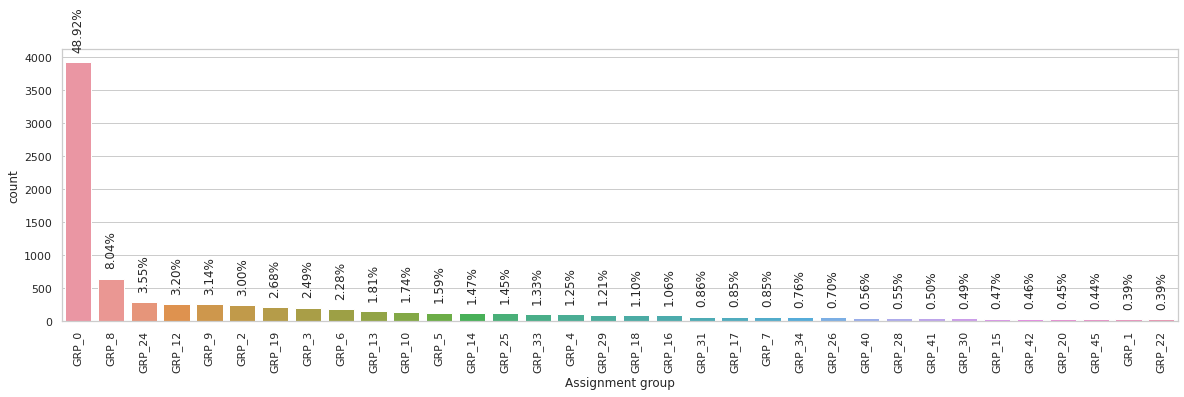

In [102]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

##### Lets view the top 20 Assignment groups with highest number of tickets¶

In [103]:
df_top_20 = df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3926
1,GRP_8,645
2,GRP_24,285
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,183
9,GRP_13,145


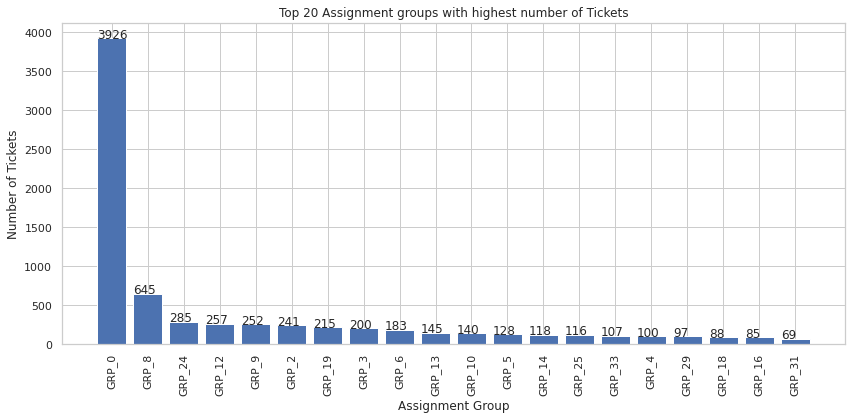

In [104]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

##### Lets view the bottom 20 Assignment groups with less number of tickets

In [105]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_1,31
1,GRP_22,31
2,GRP_45,35
3,GRP_20,36
4,GRP_42,37
5,GRP_15,38
6,GRP_30,39
7,GRP_41,40
8,GRP_28,44
9,GRP_40,45


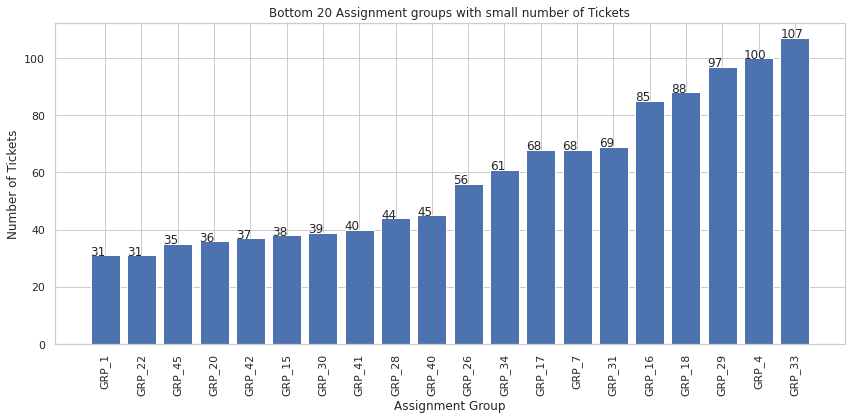

In [106]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

##### Distribution of tickets based on ticket count

In [107]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,0
1,2-5 ticket,0
2,6-10 ticket,0
3,11-20 ticket,0
4,21-50 ticket,10
5,51-100 ticket,9
6,>100 ticket,15


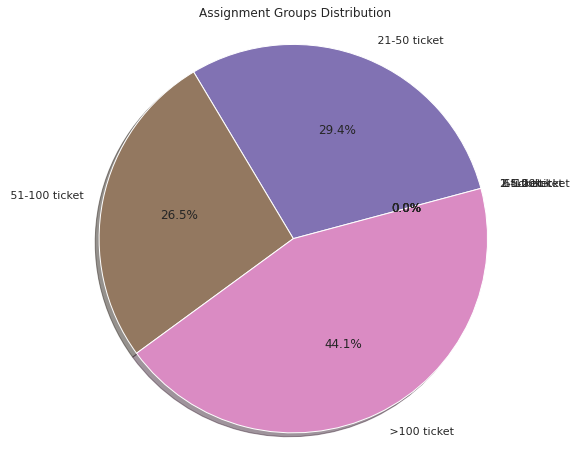

In [108]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

**Observation:**
* There are 15 Assignment group’s which have more than 100 tickets.
* Around 44% of the Assignment groups have greater than 100 tickets.

##### Derive insights on ticket distribution by L1/L2 and L3 Queues

In [109]:
df_incidents_level = df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

Text(0, 0.5, 'samples')

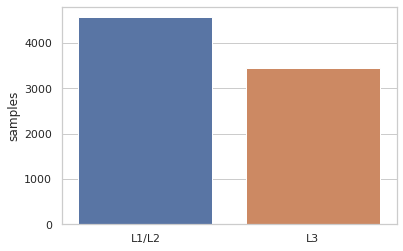

In [110]:
x=df_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

Characters in Short description by L1/L2 and L3

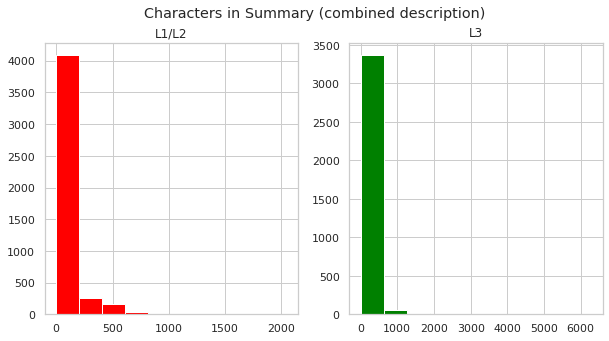

In [111]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Summary'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Summary'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in Summary (combined description)')
plt.show()

Words in Short description by L1/L2 and L3

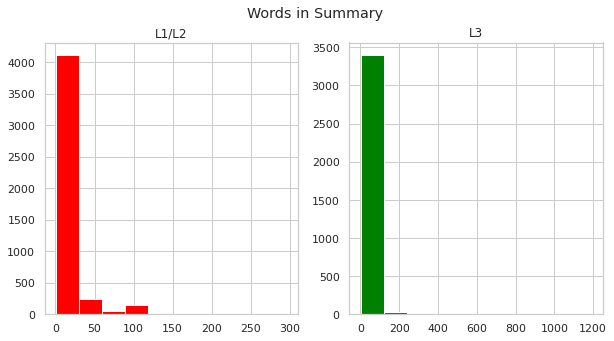

In [112]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Summary'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Summary'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in Summary')
plt.show()

##### Take a look at the average (mean) number of words in each ticket, and the longest and shortest description in our data set

In [113]:
df_incidents['desc_word_cnt'].mean()

18.536630949414402

In [114]:
print(df_incidents['desc_word_cnt'].max())
print(df_incidents['desc_word_cnt'].min())

1190
0


In [115]:
len(df_incidents[df_incidents['desc_word_cnt']==0])

47

**Average Word Count**

In [116]:
def avg_word(sentence):
  words = sentence.split()
  if len(words) > 0:
    avg_cnt = sum(len(word) for word in words)/len(words)
  else:
    avg_cnt = 0
  return (avg_cnt)


df_incidents['avg_word'] = df_incidents['Summary'].apply(lambda x: avg_word(str(x)))
df_incidents.head()

,Description,Assignment group,Summary,desc_len,desc_word_cnt,avg_word
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,verify user detail employee manager name check user name ad reset password advise user login che...,138,22,5.318182
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15,6.000000
2,received from hi i cannot log on to vpn best,GRP_0,receive hi log vpn best,23,5,3.800000
3,unable to access hr tool page,GRP_0,unable access hr tool page,26,5,4.400000
4,skype error,GRP_0,skype error,11,2,5.000000


##### Visualize a distribution of the description word counts to see how skewed our average might be by outliers. 

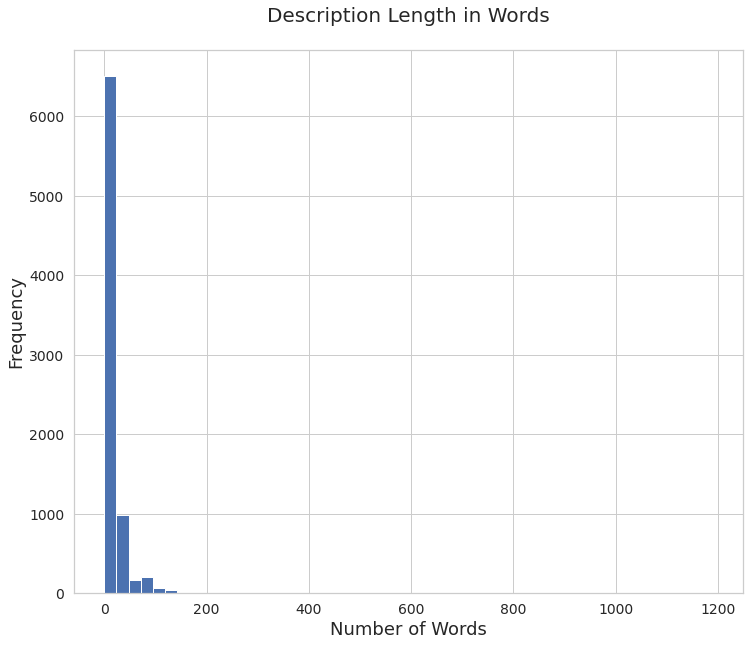

In [117]:
ax=df_incidents['desc_word_cnt'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

##### Number of unique words in each article

In [118]:
df_incidents['uniq_wds'] = df_incidents['Summary'].str.split().apply(lambda x: len(set(x)))
df_incidents['uniq_wds'].head()

0    17
1    14
2     5
3     5
4     2
Name: uniq_wds, dtype: int64

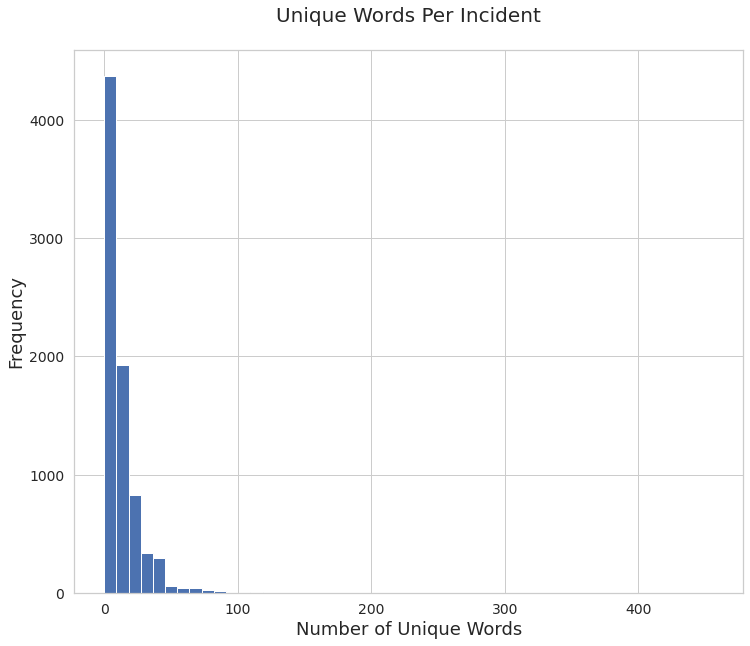

In [119]:
ax=df_incidents['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

When we plot this into a chart, we can see that while the distribution of unique words is still skewed, it looks a bit similar to the distribution based on total word counts we generated earlier.

##### Mean Number of Words in tickets per Assignment Group

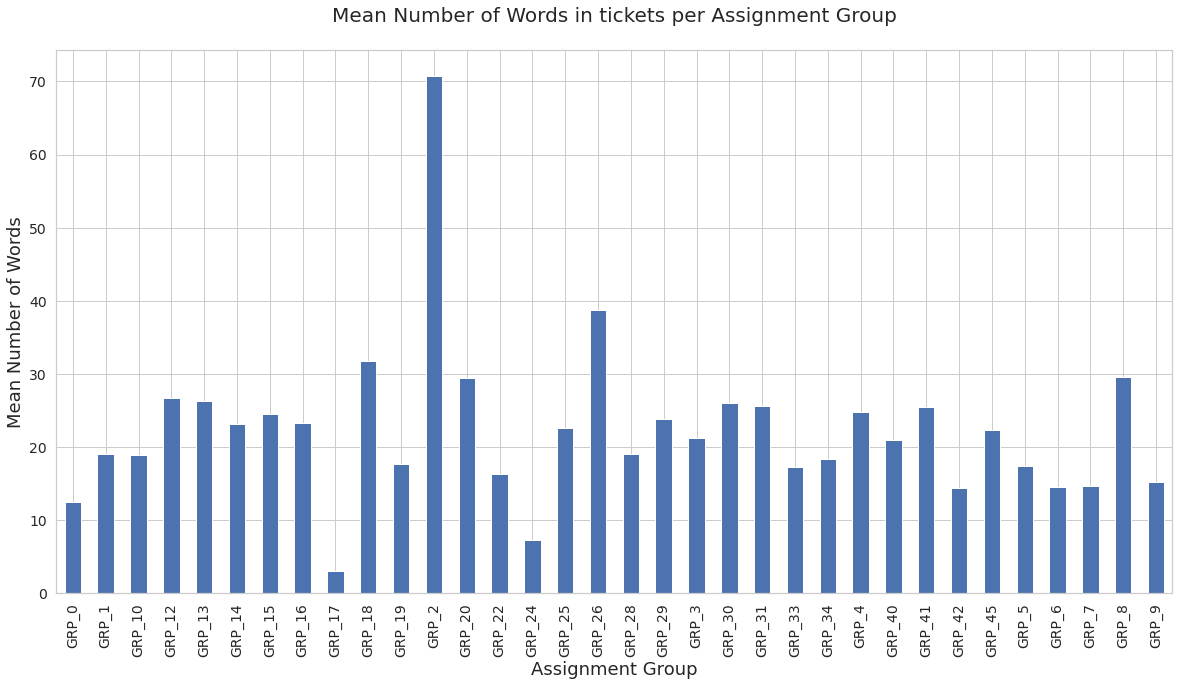

In [120]:
assign_grps = df_incidents.groupby('Assignment group')
ax=assign_grps['desc_word_cnt'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

##### Mean Number of Unique Words in tickets per Assignment Group

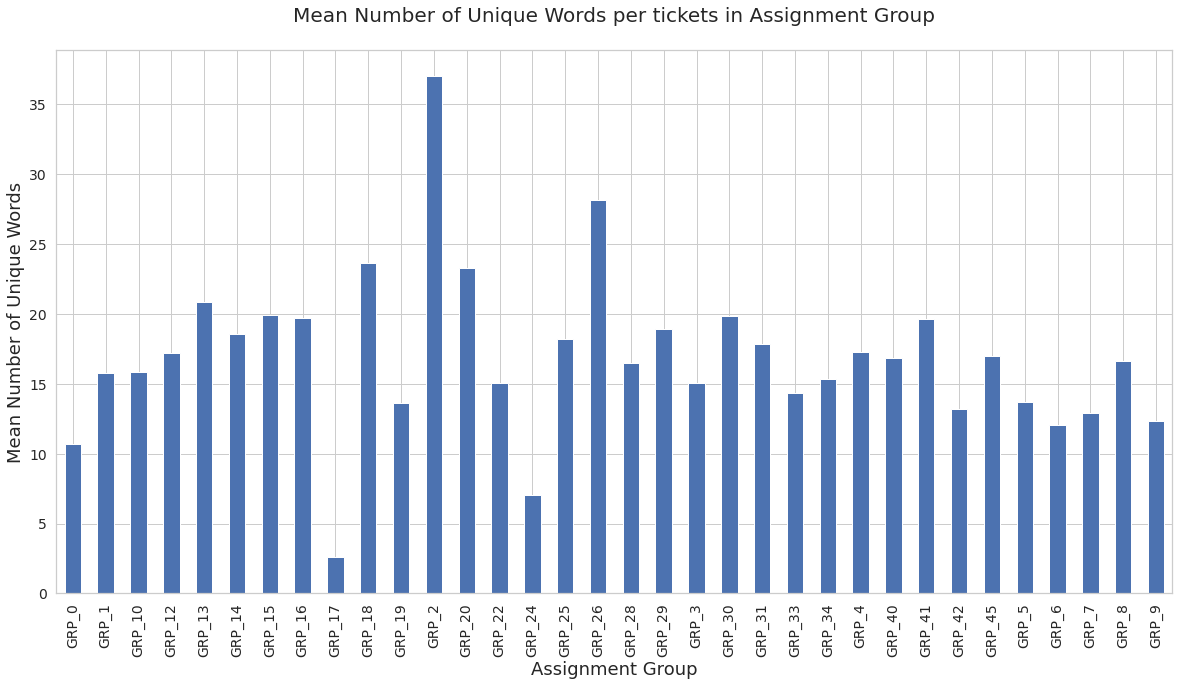

In [121]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

##### The most common words over the entire corpus.



In [122]:
wd_counts = Counter()
for i, row in df_incidents.iterrows():
    wd_counts.update(row['Summary'].split())
    
wd_counts.most_common(20)

[('job', 2455),
 ('receive', 2379),
 ('company', 2290),
 ('yes', 2018),
 ('tool', 1945),
 ('na', 1937),
 ('please', 1933),
 ('com', 1730),
 ('password', 1431),
 ('user', 1316),
 ('erp', 1158),
 ('sid', 1066),
 ('ticket', 966),
 ('access', 960),
 ('monitoring', 928),
 ('scheduler', 924),
 ('issue', 922),
 ('fail', 887),
 ('reset', 852),
 ('email', 831)]

##### WordCloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, often also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Let's write a generic method to generate Word Clouds for both Description column.

In [123]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

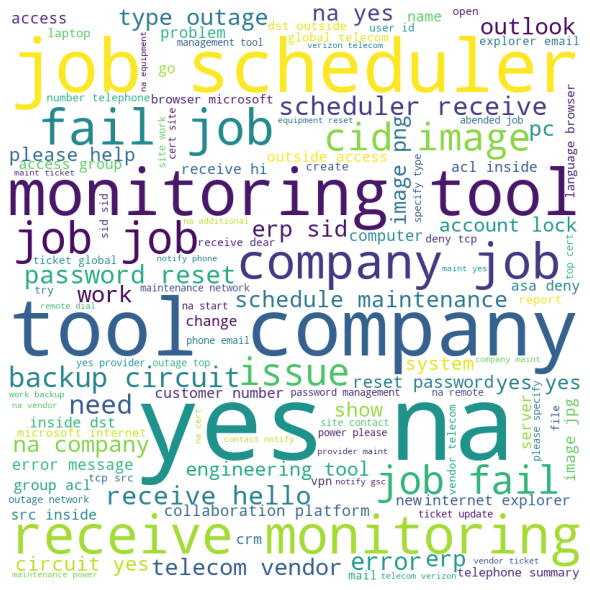

In [124]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_incidents.Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word Cloud for tickets with Assignment group 'GRP_0'

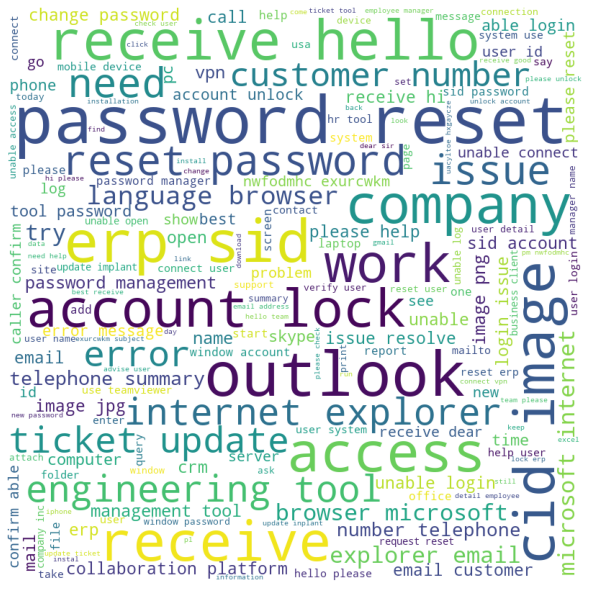

In [125]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** 
* Analysis on GRP_0 which is the most frequent group to assign a ticket to reveals that this group deals with mostly the maintenance problems such as password reset, account lock, login issue, connectivity issue, ticket update etc.
* Maximum of the tickets from GRP_0 can be reduced by self correcting itself by putting automation scripts/mechanisms to help resolve these common maintenance issues. This will help in lowering the inflow of service tickets thereby saving the person/hour efforts spend and increasing the business revenue.

Word Cloud for tickets with Assignment group 'GRP_8'

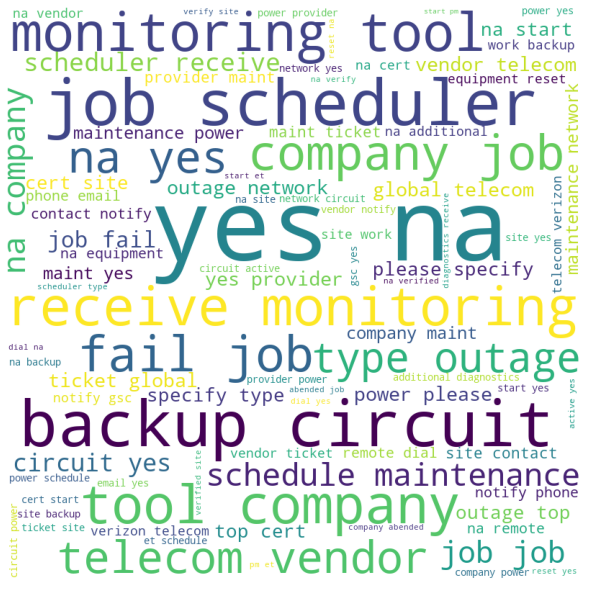

In [126]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

Word Cloud for tickets with Assignment group 'GRP_12'

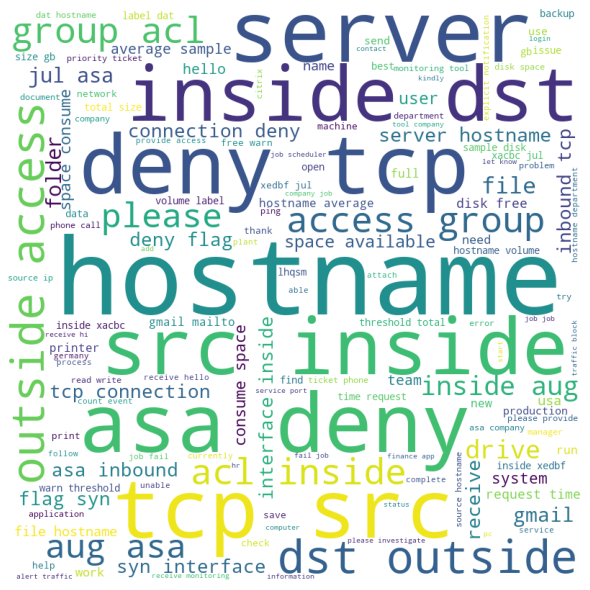

In [127]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_12 contains tickets related to systems like disk space issues, network issues like tie out, citrix issue, connectivity timeout etc.

Word Cloud for tickets with Assignment group 'GRP_24'

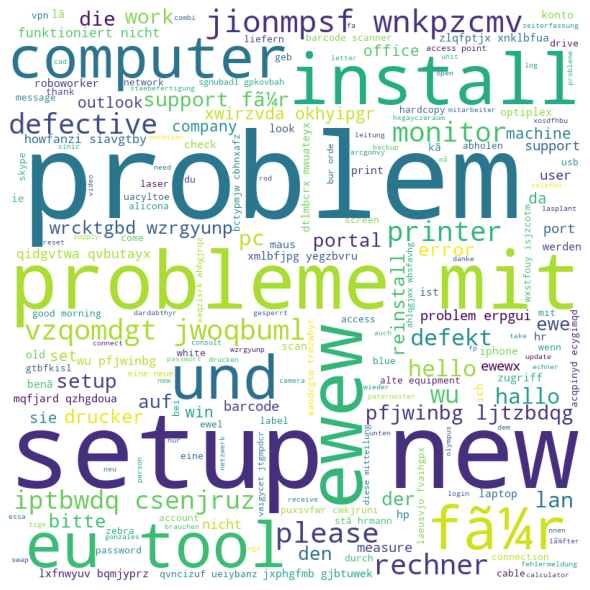

In [128]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_24 - Tickets are mainly in german, these tickets were translated to english before passing it to our model.

#### Measure Readability of a ticket
The readability of a document says about the level of ease of understanding and interpretation .The readability of a text document can be checked using various readability indices like Flesch Reading Ease, Dale Chall Readability Score, and Gunning Fog Index.

For this, we can use the **textstat** library in Python. Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document.

In [129]:
!pip install textstat
import textstat

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 8.2MB/s 


In [130]:

df_incidents['dale_chall_score']=df_incidents['Summary'].apply(lambda x: textstat.dale_chall_readability_score(x))
df_incidents['flesh_reading_ease']=df_incidents['Summary'].apply(lambda x: textstat.flesch_reading_ease(x))
df_incidents['gunning_fog']=df_incidents['Summary'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score     =>',df_incidents['dale_chall_score'].mean())
print('Flesch Reading Score =>',df_incidents['flesh_reading_ease'].mean())
print('Gunning Fog Index    =>',df_incidents['gunning_fog'].mean())

Dale Chall Score     => 10.084631198604415
Flesch Reading Score => 44.491743084972825
Gunning Fog Index    => 11.293304261151148


There is very little difference in the Dale Chall Score and the Gunning Fog Index. But there is a considerable amount of variation in the Flesch Reading Score.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the text_standard() function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completel

In [131]:
df_incidents['text_standard']=df_incidents['Summary'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of Tickets =>',df_incidents['text_standard'].mode())


Text Standard of Tickets => 0    7th and 8th grade
dtype: object


The tickets are easily understandable by anyone who has completed the 7th or 8th grade in school.

Let’s take a look at the reading time of tickets. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the reading_time() function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [132]:
df_incidents['reading_time']=df_incidents['Summary'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of =>',df_incidents['reading_time'].mean())


Reading Time of => 1.509058061300776


On looking at the reading time, people usually find shorter descriptions helpful (around 250-300 words).

In [133]:
### Save the model
from sklearn.externals import joblib
joblib.dump(df_incidents, 'EDA_data.pkl', compress=1)

['EDA_data.pkl']

In [134]:
df_incidents.to_csv(project_path + "EDA_data.csv")

In [135]:
df_incidents_level.to_csv(project_path + "Clean_data.csv")

In [136]:
### Save the model
from sklearn.externals import joblib
joblib.dump(df_incidents_level, 'Clean_data.pkl', compress=1)

['Clean_data.pkl']

In [138]:
# Save as pickle file
import pickle
df_incidents_level.to_pickle('Clean_data_new.pickle')
#with open('Clean_data_new.pickle', 'wb') as f:
#    pickle.dump(df_incidents_level, f)

#Read the pickle file
#df_incidents_level = pd.read_pickle('Clean_data_new.pickle')


### Topic Modeling
We need to convert our text into numbers or vectors. So following methods are used

In [139]:
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

##### Count Vectorizer
The CountVectorizer method of vectorizing tokens transposes all the words/tokens into features and then provides a count of occurrence of each word. The result is called a document term matrix

In [140]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df_incidents_level['Summary'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,abended,able,accept,access,account,action,activate,activation,active,activity,ad,add,additional,address,admin,administrator,advise,aerp,affect,agent,alert,allow,already,also,alternate,analysis,another,anymore,ap,apac,app,appear,application,approval,approve,area,asa,ask,assign,assist,...,vendor,verified,verify,verizon,version,via,view,vip,visitor,volume,von,vpn,want,warehouse,warm,warn,way,web,website,wednesday,week,welcome,well,wifi,win,window,windows,wireless,within,without,word,work,workflow,would,write,wrong,yes,yesterday,æ³,æœ
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### LDA Topic Modelling
Now that we have prepared our data for topic modeling, we’ll be using the Latent Dirichlet Allocation (LDA) approach to determine the topics present in our corpus. In our model, we are going to produce 10 individual topics (ie. n_components). Once the model is created let’s create a function to display the identified topics. Each topic will consist of 10 words. The function will have three required parameters; the LDA model, feature names from the document term matrix, and the number of words per topic.

In [111]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
receive please hello image cid outlook help team open file
Topic 1:
event send server tcp hostname asa ip ticket subject device
Topic 2:
yes na site power circuit ticket vendor backup telecom type
Topic 3:
job company tool com receive monitoring scheduler fail sid abended
Topic 4:
password user reset login tool erp sid account unable engineering
Topic 5:
com receive company please gmail mailto check sale folder mit
Topic 6:
erp error please printer get id usa print order system
Topic 7:
user account connect sid work access vpn connection system lock
Topic 8:
access problem call report deny agent time via data alert
Topic 9:
number customer pc email name plant microsoft internet summary language


Topics produced via LDA are - 
* Topic 0 - Printer 
* Topic 1 - User Account
* Topic 2 - Password Reset 
* Topic 3 - Outlook, Skype
* Topic 4 - Server
* Topic 5 - Scheduler
* Topic 6 - Port
* Topic 7 - ?
* Topic 8 - ?
* Topic 9 - ?

In [112]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2      32.420952   8.115230       1        1  14.082150
0       0.648955  71.707100       2        1  12.970541
6      71.019684   9.971006       3        1  12.607321
1       3.785981  33.185135       4        1  11.840613
3     -42.666500  -9.222070       5        1  10.387980
4      -3.621689 -43.526516       6        1   9.127250
7      -3.632402  -4.171708       7        1   7.771392
5     -36.584400  35.804413       8        1   7.677326
8      44.391380  50.615383       9        1   6.998883
9      40.235809 -31.591665      10        1   6.536544, topic_info=         Term         Freq        Total Category  logprob  loglift
302       job  2375.000000  2375.000000  Default  30.0000  30.0000
655       yes  2058.000000  2058.000000  Default  29.0000  29.0000
371        na  1975.000000  1975.000000  Default  28.0000  28.0000
411  password  1374.000000  1374.000000  Default  27.0000  27.0000
473   receive  2313.000000  2313.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
374      need   103.734577   693.250069  Topic10  -4.2111   0.8282
650      work    99.652245   799.361894  Topic10  -4.2513   0.6456
299     issue    85.808248   902.596048  Topic10  -4.4008   0.3746
240       get    59.797389   605.186412  Topic10  -4.7620   0.4132
97   computer    56.199808   227.547593  Topic10  -4.8240   1.3293

[488 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         5  0.990895   abended
1         3  0.248257      able
1         6  0.419278      able
1         7  0.228948      able
1         9  0.102061      able
...     ...       ...       ...
651       2  0.973483  workflow
652       4  0.373455     would
652       8  0.622425     would
655       1  0.999556       yes
658       2  0.980718        æœ

[594 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 2, 4, 5, 8, 6, 9, 10])

##### TF-IDF 
LDA isn’t the only approach to topic modeling. Let’s try another method named the Non-Negative Matrix Factorization (NMF) approach and see if our topics can be slightly more defined. Instead of using the simple CountVectorizer method to vectorize our words/tokens, we’ll use the TF-IDF (Term Frequency — Inverse Document Frequency) method. The TF-IDF method helps to bring down the weight/impact of high-frequency words.

In [141]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df_incidents_level['Summary'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,abended,able,accept,access,account,action,activate,activation,active,activity,ad,add,additional,address,admin,administrator,advise,aerp,affect,agent,alert,allow,already,also,alternate,analysis,another,anymore,ap,apac,app,appear,application,approval,approve,area,asa,ask,assign,assist,...,vendor,verified,verify,verizon,version,via,view,vip,visitor,volume,von,vpn,want,warehouse,warm,warn,way,web,website,wednesday,week,welcome,well,wifi,win,window,windows,wireless,within,without,word,work,workflow,would,write,wrong,yes,yesterday,æ³,æœ
0,0.0,0.173781,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.219249,0.0,0.0,0.0,0.0,0.0,0.212024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.217152,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.249245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.282362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.519174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.381649,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,0.0,0.000000,0.0,0.000000,0.346095,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291094,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8022,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432815,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8023,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.436380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,0.0,0.000000,0.0,0.000000,0.0000

In [114]:
len(tfidf.todense())

8026

In [115]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
job scheduler monitoring com fail tool company receive abended sid
Topic 1:
password reset management request window change tool manager user please
Topic 2:
account lock window unlock ad get user expire check unlocked
Topic 3:
please receive user hello help issue image cid error access
Topic 4:
yes na circuit power site telecom vendor backup outage cert
Topic 5:
unable login connect skype vpn engineering tool log collaboration platform
Topic 6:
ticket update inplant implant inc printer driver query call print
Topic 7:
erp sid unlock user reset system production log account issue
Topic 8:
internet explorer summary browser email number telephone microsoft customer language
Topic 9:
outlook crm issue open work launch load email respond unable


Topics produced via NMF are - 
* Topic 0 - Scheduler 
* Topic 1 - Password Reset
* Topic 2 - Account lock 
* Topic 3 - ?
* Topic 4 - Power Outage
* Topic 5 - Mail/Skype
* Topic 6 - Printer
* Topic 7 - User account
* Topic 8 - Browser
* Topic 9 - Outlook

The topics produced via NMF seem to be much more distinct compared to LDA.

Let’s add both the LDA and NMF topics into our dataframe for further analysis. Let’s also remap the integer topics into our subjectively derived topic labels.

In [116]:
nmf_topic_values = nmf.transform(tfidf)
df_incidents_level['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df_incidents_level['lda_topics'] = lda_topic_values.argmax(axis=1)
lda_remap = {0: 'Printer', 1: 'User Account', 2: 'Password Reset', 3: 'Mail/Skype', 
             4: 'Server', 5: 'Scheduler', 6: 'Port', 
             7: 'Unknown1', 8: 'Unknown2', 9: 'Unknown3'}
df_incidents_level['lda_topics'] = df_incidents_level['lda_topics'].map(lda_remap)
nmf_remap = {0: 'Scheduler', 1: 'Password Reset', 2: 'Account Lock', 3: 'Unknown', 
             4: 'Power Outage', 5: 'Mail/Skype', 6: 'Printer', 7: 'User Account', 
             8: 'Browser', 9: 'Outlook'}
df_incidents_level['nmf_topics'] = df_incidents_level['nmf_topics'].map(nmf_remap)

##### Plot the top most reasons for raising a ticket

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

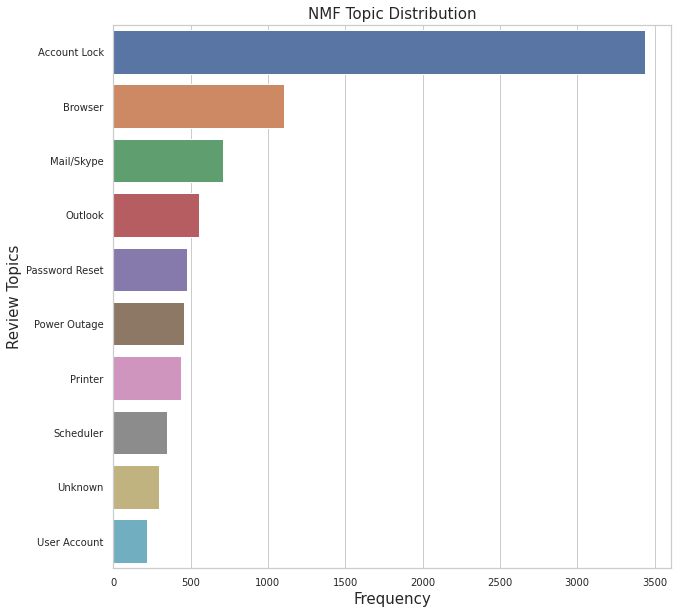

In [119]:
nmf_x = df_incidents_level['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(10,10))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=15)
plt.ylabel('Review Topics', fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel('Frequency', fontsize=15)
plt.xticks(fontsize=10)

#### Try and see if the data could be clustered

In [142]:

# word level tf-idf for ticket
tfidf1 = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf1.fit_transform(df_incidents_level['Summary'])

In [143]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf2 = dict(zip(tfidf1.get_feature_names(), tfidf1.idf_))
tfidf2 = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf2), orient='index')
tfidf2.columns = ['tfidf']

Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [144]:
tfidf2.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
receive,2.263472
company,2.549246
tool,2.582036
please,2.590557
com,2.777534
company com,2.938711
job,3.108129
password,3.137267
monitoring,3.157534
tool company,3.160772


Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [145]:
tfidf2.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
dst outside,7.911125
outside access,7.911125
tcp src,7.793342
deny tcp,7.793342
group acl,7.687981
access group,7.687981
acl,7.687981
acl inside,7.687981
inside dst,7.687981
src inside,7.687981


**TF-IDF Distribution**

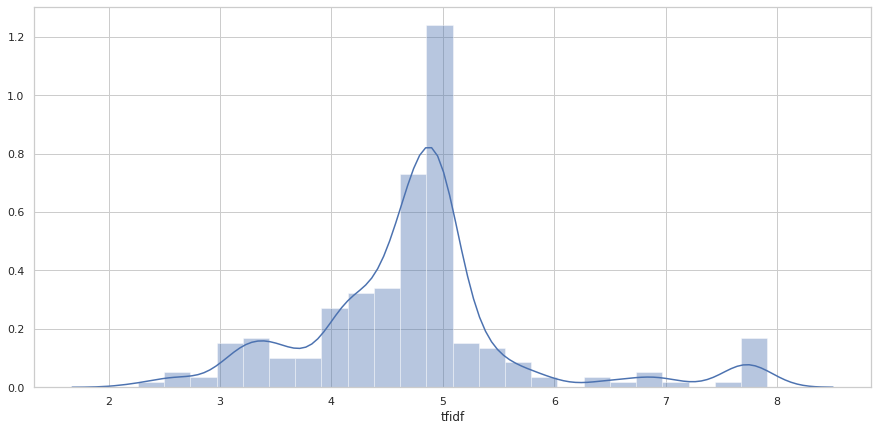

In [146]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf2["tfidf"])

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

#### Dimensionality Reduction using t-SNE

In [126]:
from sklearn.decomposition import TruncatedSVD

n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(tfidf)

In [127]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computed neighbors for 8026 samples in 0.770s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8026
[t-SNE] Computed conditional probabilities for sample 2000 / 8026
[t-SNE] Computed conditional probabilities for sample 3000 / 8026
[t-SNE] Computed conditional probabilities for sample 4000 / 8026
[t-SNE] Computed conditional probabilities for sample 5000 / 8026
[t-SNE] Computed conditional probabilities for sample 6000 / 8026
[t-SNE] Computed conditional probabilities for sample 7000 / 8026
[t-SNE] Computed conditional probabilities for sample 8000 / 8026
[t-SNE] Computed conditional probabilities for sample 8026 / 8026
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.691498
[t-SNE] KL divergence after 500 iterations: 1.084161


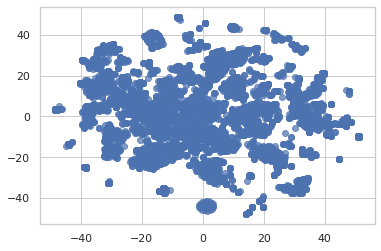

In [128]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

**Observation:**
We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset.

##### Clustering using Agglomerative Clustering

In [ ]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model.fit(inc_clus['embedding'].values.tolist())

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
Z = linkage(inc_clus['embedding'].values.tolist(), metric='euclidean', method='average')
dendrogram(Z, leaf_rotation=90, color_threshold=40, leaf_font_size=8)
plt.tight_layout()

In [ ]:
### Save the model
from sklearn.externals import joblib
joblib.dump(svc, 'Topic_Model_data.pkl', compress=1)

### Model Building

Since the dataset is very imbalanced, we will be considering a subset of groups for predictions. In 74 groups, 46% of tickets belong to group 1 and 16 groups have more than 100 tickets and around 22 groups have more than 50 tickets, rest of the Assignment groups have very less ticket counts which might not add much value to the model prediction. If we conducted random sampling towards all the subcategories, then we would face a problem that we might miss all the tickets in some categories. Hence, we considered the groups that have more than 50 tickets in this appoach

Let's proceed towards trying different model architectures mentioned below to classify the problem and validate which one is outperforming.

* Multinomial Naive Bayes
* K Nearest neighbor
* Support Vector Machine
* Decision Tree
* Random Forest
* Deep Neural Network
* Convolutional Neural Network
* Recurrent Neural Network
* Recurrent Convolutional Neural Network
* RNN with LSTM

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [147]:
from time import time
# Traditional Modeling
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost.sklearn import XGBClassifier

# Tools & Evaluation metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, auc, f1_score
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler

##### Create training and test datasets

Since the data is highly imbalanced, consider only the assignment groups which have tickets more then 50.

In [148]:
df_incidents_level = df_incidents_level[df_incidents_level['Assignment group'].map(df_incidents_level['Assignment group'].value_counts()) > 50]
x = df_incidents_level['Summary']
y = df_incidents_level['Assignment group']


encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

# Create training and test datasets with 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val]
    
 #Create a dataframe to capture the accuracy and f1-score of various models   
log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

Shape of the training set: (6120,) (1530,)
Shape of the test set: (6120,) (1530,)


##### Create a pipeline using count vectorizer, tf-idf and various classification models

In [190]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, clfname, arch_name=None, pipelineRequired=True, isDeepModel=False):
    global log
    timer.start()
    # train the model
    clf = estimator
    modelname = clfname
   
    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')
    log_entry = pd.DataFrame([[modelname,accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
    log = log.append(log_entry)


**Multinomial Naive Bayes**

In [191]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test,"MultinomialNB")

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training accuracy: 61.57%
Testing accur

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Linear SVC**

In [193]:
run_classification(OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42,class_weight='balanced')), X_train, X_test, y_train, y_test, "LinearSVC")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                         class_weight='balance

**SGD Classifier**

In [195]:
run_classification(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None,class_weight='balanced'), 
                   X_train, X_test, y_train, y_test, "SGDClassifier")

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 SGDClassifier(alpha=0.001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                               loss='hinge'

**Logistic Regression**

In [196]:
run_classification(LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced'), X_train, X_test, y_train, y_test, "LogisticRegression")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight='balanced',
                                    dual=False, fit_intercept=True,
  

**XGBoost**

In [197]:
run_classification(XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1), X_train, X_test, y_train, y_test, "XGBoost")

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weig

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [198]:
run_classification(RandomForestClassifier(max_depth=15, random_state=0, class_weight="balanced"), X_train, X_test, y_train, y_test, "RandomForest")

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=N

**Decision Tree Classifier**

In [199]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, "DecisionTree")

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
   

**K-Nearest Neighbours**

In [200]:
run_classification(KNeighborsClassifier(n_neighbors= 5 , weights = 'distance'), X_train, X_test, y_train, y_test, "KNN")

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

,accuracy,f1_score
Classifier,,
KNN,0.428758,0.342163
RandomForest,0.425490,0.372501
SGDClassifier,0.573203,0.537097
DecisionTree,0.634641,0.644434
LogisticRegression,0.683007,0.682330
LinearSVC,0.703922,0.709335
XGBoost,0.699346,0.736557
MultinomialNB,0.607843,0.741539


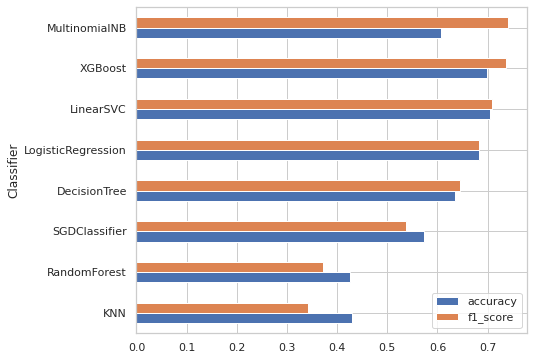

In [203]:
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

**Observation:** 
* Multinomial NB, XGBoost and Linear SVC have better performance but still are overfitted since the training accuracy is around 90% for most of the models and the testing accuracies, f1-scores are plotted above 
* We would be fine tuning the models and reduce the overfitting in next iteration.
* The performance can be further improved by collecting more data for tickets and by running deep learning models like RNN and LSTM's.

In [ ]:
### Save the model
from sklearn.externals import joblib
joblib.dump(svc, 'ML_algorithm_classification.pkl', compress=1)

### Hyperparameter Tuning
Let's tune each of the models using GridsearchCV to identify the best parameters

**Linear SVC**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"clf__estimator__C": [0.1, 1, 10, 100, 1000],  
              'clf__estimator__loss': ['hinge','squared_hinge'],}  
  
clf_svc = GridSearchCV(svc, param_grid=params, refit = True, verbose = 1,scoring='f1_weighted') 
# fitting the model for grid search 
clf_svc.fit(X_train, y_train)

print("Best Score: ", clf_svc.best_score_)
print("Best Params: ", clf_svc.best_params_)

In [ ]:
y_pred = clf_svc.best_estimator_.predict(X_test)
#predictions = clf_svc.best_estimator_.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LinearSVC_best_estimator",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols,index=['LinearSVC_best_estimator'])
log1 = log1.append(log_entry)

**SGD Classifier**

In [ ]:
params = {
    "clf__loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "clf__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "clf__penalty" : ["l2", "l1", "none"],
}

clf_sgd = GridSearchCV(sgd, param_grid=params,refit = True, verbose = 1,scoring='f1_weighted')
clf_sgd.fit(X_train, y_train)

print("Best Score: ", clf_sgd.best_score_)
print("Best Params: ", clf_sgd.best_params_)

In [ ]:
y_pred = clf_sgd.best_estimator_.predict(X_test)
#predictions = clf_svc.best_estimator_.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SGD_best_estimator",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols,index=['SGD_best_estimator'])
log1 = log1.append(log_entry)

**Logistic Regression**

In [ ]:
params = {
  'clf__penalty': ['l2'],
  'clf__C': [1e-4, 1e4],
  'clf__max_iter': [100,4000,5000],
}

clf_lr = GridSearchCV(logreg_1, param_grid=params, refit = True,verbose = 1,scoring='f1_weighted')
clf_lr.fit(X_train, y_train)

print("Best Score: ", clf_lr.best_score_)
print("Best Params: ", clf_lr.best_params_)

In [ ]:
y_pred = clf_lr.best_estimator_.predict(X_test)
#predictions = clf_svc.best_estimator_.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LogisticRegression_best_estimator",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols,index=['LogisticRegression_best_estimator'])
log1 = log1.append(log_entry)

In [ ]:
log1.sort_values(by=['f1_score'])

In [ ]:
log1.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

### Extract Glove Embeddings
Extract Glove 6Billion word embeddings. We're going to use the 100d and 200d file which has 100 and 200 embedding dimensions for each word in the corpus respectively.

In [ ]:
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove.6B/glove.6B.100d.txt'):
    glove_embeddings = project_path + 'glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove.6B')

# List the files under extracted folder
os.listdir('glove.6B')

In [ ]:
gloveFileName = project_path + 'glove.6B/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

#### Neural Network